In [2]:
import pandas as pd
import numpy as np
train=pd.read_csv('train.csv')
df=pd.DataFrame(train)
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

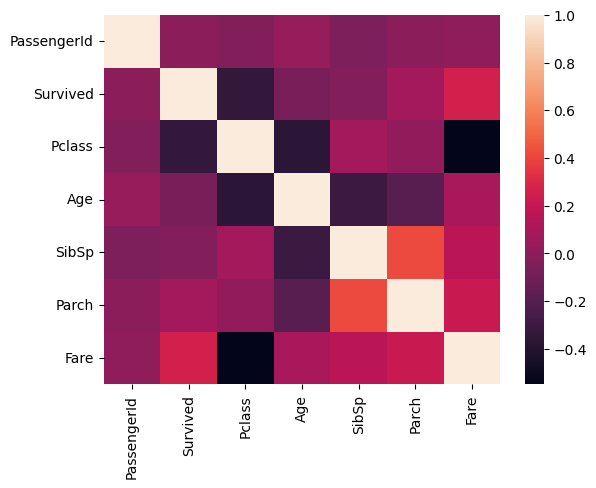

In [4]:
sns.heatmap(df.corr())

In [9]:
df=df.drop(['Name','Cabin'],axis=1)
np.sum(df.isnull())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [12]:
df=df.drop('Ticket',axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
np.sum(df.isnull())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [15]:
dfn=df.dropna()
np.sum(dfn.isnull())


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
dfn.describe()
dfn

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


<AxesSubplot:xlabel='Survived', ylabel='count'>

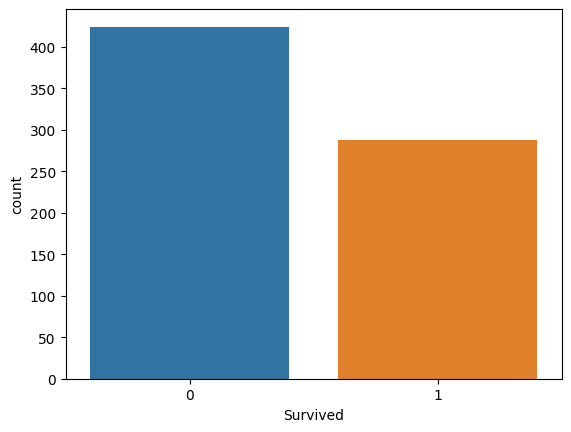

In [17]:
sns.countplot(x='Survived',data=dfn)

In [18]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [19]:
import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing


In [20]:
y=dfn['Survived']

In [21]:
df=dfn.drop('Survived',axis=1)

In [22]:
np.sum(df['Parch']==0)
df=df.drop(['SibSp','Parch'], axis=1)

In [23]:
df=pd.get_dummies(df)


In [24]:
X=scale(df)

In [25]:
LogR=LogisticRegression()
LogR.fit(X,y)
LogR.score(X,y)

0.797752808988764

In [26]:
ypred=LogR.predict(X)
from sklearn.metrics import classification_report
print(classification_report(y,ypred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       424
           1       0.76      0.73      0.74       288

    accuracy                           0.80       712
   macro avg       0.79      0.79      0.79       712
weighted avg       0.80      0.80      0.80       712



In [27]:
test=pd.read_csv("test.csv")
dft=pd.DataFrame(test)

In [28]:
dft=dft.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1)


In [29]:
dft=dft.dropna()
dft=pd.get_dummies(dft)

In [30]:
dft

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,7.8292,0,1,0,1,0
1,3,47.0,7.0000,1,0,0,0,1
2,2,62.0,9.6875,0,1,0,1,0
3,3,27.0,8.6625,0,1,0,0,1
4,3,22.0,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...
409,3,3.0,13.7750,1,0,0,0,1
411,1,37.0,90.0000,1,0,0,1,0
412,3,28.0,7.7750,1,0,0,0,1
414,1,39.0,108.9000,1,0,1,0,0


In [31]:
X_test=scale(dft)

In [32]:
pred_test=LogR.predict(X_test)

In [33]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [38]:
log2=LogisticRegression()
log2.fit(X_train,y_train)
log2.score(X_train,y_train)

0.8092243186582809

In [37]:
ypred=log2.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(y_train,ypred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       288
           1       0.77      0.75      0.76       189

    accuracy                           0.81       477
   macro avg       0.80      0.80      0.80       477
weighted avg       0.81      0.81      0.81       477



In [40]:
ypred=log2.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       136
           1       0.75      0.69      0.72        99

    accuracy                           0.77       235
   macro avg       0.77      0.76      0.76       235
weighted avg       0.77      0.77      0.77       235



In [42]:
log2.score(X_test,y_test)
len(ypred)

235

In [43]:
X_test=scale(dft)

In [45]:
y_predict=LogR.predict(X_test)
y_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [46]:
len(y_predict)

331